**Tensorflow**

*   Tensorflow is an open-sourse  deep learning library.
*   Tensorflow created by Google Brain Team.

*   The main concern is high end efficient computing for different deep learning operation.

**Keras**

*   Keras is an open-source deep learning library.
*   Simple and clean interface. 

*   Allow deep learning mathematical libraries like Tensorflow as the backend.

**Tensorflow - Keras**

*   New version of TensorFlow (TensorFlow 2) Google integrate the Keras API directly and promoted this interface as the default interface.
*   Single library can now be used instead of two separate libraries.










**3 ways to create keras models in tensorflow 2.x**

*   Sequential
*   Functional
*   Model Subclassing

Machine learning architecture works mainly in four parts:

    

*   Preprocessing the data
*   Build the model


*   Compile the model.

*   Train and estimate the model







In [1]:
import tensorflow as tf
from tensorflow.keras import Model, activations
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Sequential
import numpy as np

Import tensorflow prebuilt dataset Fashion_MNIST

In [2]:
train,test = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


We will use Fashion Mnist dataset.
contains 10 classes of grayscale fashion images.


0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

In [3]:
train_x = train[0]
train_y = train[1]
test_x = test[0]
test_y = test[1]

In [4]:
print(train_x.shape)
print(train_y.shape)
print(train_y[0:10])
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
[9 0 0 3 0 2 7 2 5 5]
(10000, 28, 28)
(10000,)


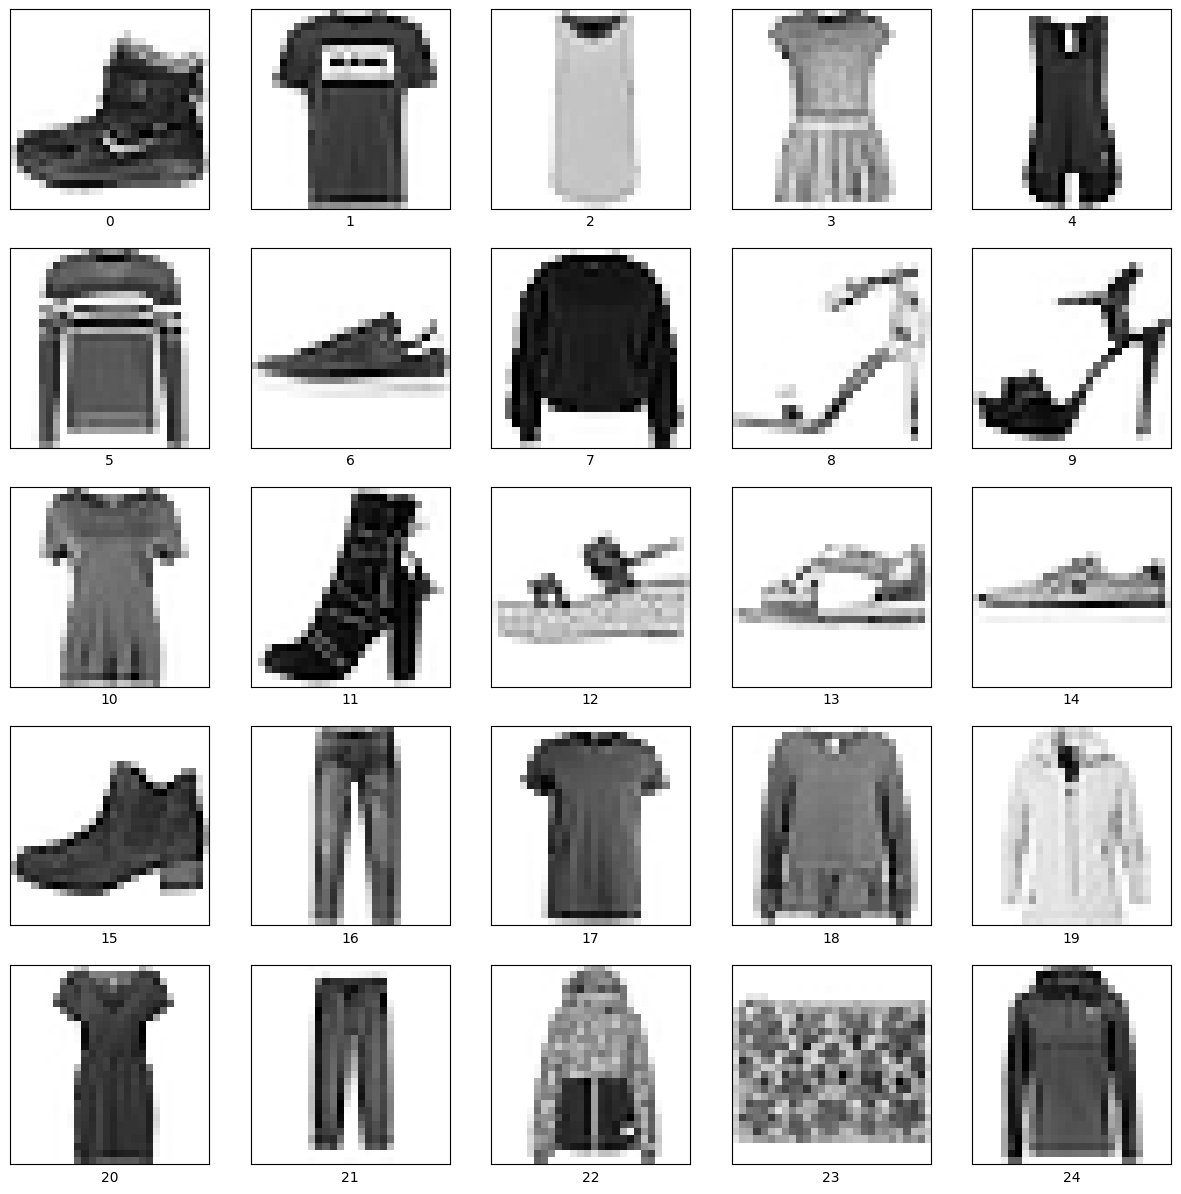

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_x[i],cmap='Greys')
  plt.xlabel(i)
plt.show()

In [6]:
train_x = np.reshape(train_x,[60000,28*28])
test_x = np.reshape(test_x,[10000,28*28])

train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

train_x =train_x/ 255.
test_x = test_x/255.

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


**Tensorflow-Keras Sequential API**

Keras Sequential API is by far the easiest way to get up and running with Keras, but it’s also the most limited 








In [7]:
def my_sequential_model(inp_dim, noc = 10):
  model = Sequential()
  model.add(Dense(input_dim = inp_dim, units= 50, name='dense-1', activation='relu'))
  model.add(Dense(units=50, name='dense-2', activation='relu'))
  model.add(Dense(units=noc, activation='softmax'))
  return model

In [8]:
my_model = my_sequential_model(len(train_x[0]))
base_learning_rate = 0.0001
my_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                      loss=tf.keras.losses.categorical_crossentropy,
                      metrics = ['accuracy'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense-1 (Dense)             (None, 50)                39250     
                                                                 
 dense-2 (Dense)             (None, 50)                2550      
                                                                 
 dense (Dense)               (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


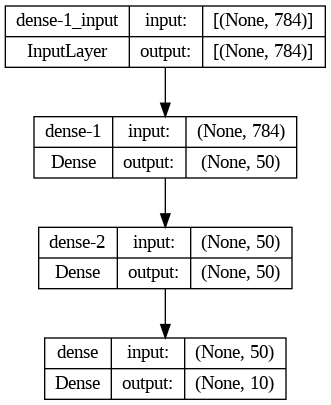

In [9]:
tf.keras.utils.plot_model(my_model,'my_model.png',show_shapes=True)

In [10]:
best_acc = 0
for e in range(20):
  history = my_model.fit(train_x, train_y, batch_size = 32, validation_data=(test_x,test_y), verbose=True, epochs=1)
  val_acc = history.history['val_accuracy'][0]
  if val_acc > best_acc:
    my_model.save('model_weights'+'.h5')
    best_acc = val_acc

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2115 - accuracy: 0.9192 - val_loss: 0.3702 - val_accuracy: 0.8789


In [11]:
my_model=tf.keras.models.load_model('model_weights.h5')
predictions = my_model.predict(test_x[0:10])
i=0
for sample in predictions:
  print("Original---->",np.argmax(test_y[i]),"Predictted---->",np.argmax(sample))
  i +=1

1/1 [==============================] - 0s 88ms/step
Original----> 9 Predictted----> 9
Original----> 2 Predictted----> 2
Original----> 1 Predictted----> 1
Original----> 1 Predictted----> 1
Original----> 6 Predictted----> 6
Original----> 1 Predictted----> 1
Original----> 4 Predictted----> 4
Original----> 6 Predictted----> 6
Original----> 5 Predictted----> 5
Original----> 7 Predictted----> 7


**Tensorflow-Keras Functional API**

Using the Functional API you can:

1. Create more complex models.
2. Have multiple inputs and multiple outputs.
3. Easily define branches in your architectures.




In [12]:
# Sequential connection
def my_functional_model(inp_shape, noc=10):
  inputs = Input(shape=inp_shape)  
  layer1 = Dense(units=50, name='dense-1')(inputs)
  act1= Activation('relu')(layer1)
  layer2 = Dense(units=50, name='dense-2')(act1)
  act2 = Activation('relu')(layer2)
  out_layer= Dense(noc, activation='softmax')(act2)
  model = Model(inputs=inputs, outputs=out_layer)
  return model

In [13]:
'''
# Concatenate two intermediate layers
def my_functional_model(inp_shape, noc=10):
  inputs = Input(shape=inp_shape)
  layer1 = Dense(units=50, name='dense-1')(inputs)
  act1= Activation('relu')(layer1)
  layer2 = Dense(units=50, name='dense-2')(inputs)
  act2 = Activation('relu')(layer2)
  layer3 = tf.keras.layers.concatenate([act1,act2],axis=1)
  act3 = Activation('relu')(layer3) 
  out_layer= Dense(noc, activation='softmax')(act3)
  model = Model(inputs=inputs, outputs=out_layer)
  return model
'''

"\n# Concatenate two intermediate layers\ndef my_functional_model(inp_shape, noc=10):\n  inputs = Input(shape=inp_shape)\n  layer1 = Dense(units=50, name='dense-1')(inputs)\n  act1= Activation('relu')(layer1)\n  layer2 = Dense(units=50, name='dense-2')(inputs)\n  act2 = Activation('relu')(layer2)\n  layer3 = tf.keras.layers.concatenate([act1,act2],axis=1)\n  act3 = Activation('relu')(layer3) \n  out_layer= Dense(noc, activation='softmax')(act3)\n  model = Model(inputs=inputs, outputs=out_layer)\n  return model\n"

In [14]:
'''
# Add two intermediate layers
def my_functional_model(inp_shape, noc=10):
  inputs = Input(shape=inp_shape)  
  layer1 = Dense(units=50, name='dense-1')(inputs)
  act1= Activation('relu')(layer1)
  layer2 = Dense(units=50, name='dense-2')(inputs)
  act2 = Activation('relu')(layer2)
  layer3 = tf.keras.layers.add([act1,act2])
  act3 = Activation('relu')(layer3)
  out_layer= Dense(noc, activation='softmax')(act3)
  model = Model(inputs=inputs, outputs=out_layer)
  return model
'''

"\n# Add two intermediate layers\ndef my_functional_model(inp_shape, noc=10):\n  inputs = Input(shape=inp_shape)  \n  layer1 = Dense(units=50, name='dense-1')(inputs)\n  act1= Activation('relu')(layer1)\n  layer2 = Dense(units=50, name='dense-2')(inputs)\n  act2 = Activation('relu')(layer2)\n  layer3 = tf.keras.layers.add([act1,act2])\n  act3 = Activation('relu')(layer3)\n  out_layer= Dense(noc, activation='softmax')(act3)\n  model = Model(inputs=inputs, outputs=out_layer)\n  return model\n"

In [15]:
print(train_x[0].shape)
my_model= my_functional_model(train_x[0].shape)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
l= tf.keras.losses.categorical_crossentropy
my_model.compile(optimizer=opt, loss=l, metrics=['accuracy'])
my_model.summary()

(784,)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense-1 (Dense)             (None, 50)                39250     
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense-2 (Dense)             (None, 50)                2550      
                                                                 
 activation_1 (Activation)   (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trai

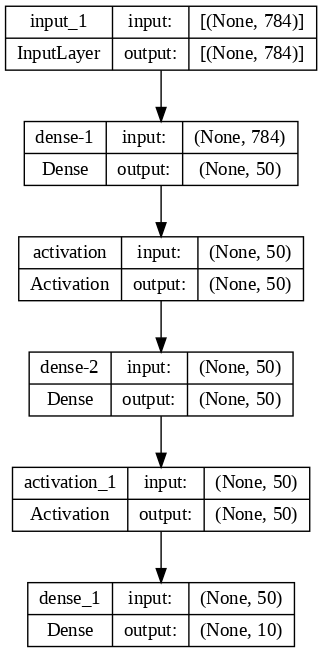

In [16]:
tf.keras.utils.plot_model(my_model,'my_model.png',show_shapes=True,dpi=100)

In [17]:
best_acc = 0
for e in range(20):
  history = my_model.fit(train_x, train_y, batch_size = 32, validation_data=(test_x,test_y), verbose=True, epochs=1)
  val_acc = history.history['val_accuracy'][0]
  if val_acc > best_acc:
    my_model.save('model_weights_func'+str(e)+'.h5')
    best_acc = val_acc


1875/1875 [==============================] - 6s 3ms/step - loss: 0.3050 - accuracy: 0.8920 - val_loss: 0.3631 - val_accuracy: 0.8712


In [19]:
my_model=tf.keras.models.load_model('model_weights_func16.h5')
predictions = my_model.predict(test_x[10:20])
i=10
for sample in predictions:
  print("Original---->",np.argmax(test_y[i]),"Predictted---->",np.argmax(sample))
  i +=1

1/1 [==============================] - 0s 91ms/step
Original----> 4 Predictted----> 4
Original----> 5 Predictted----> 5
Original----> 7 Predictted----> 5
Original----> 3 Predictted----> 3
Original----> 4 Predictted----> 4
Original----> 1 Predictted----> 1
Original----> 2 Predictted----> 2
Original----> 4 Predictted----> 2
Original----> 8 Predictted----> 8
Original----> 0 Predictted----> 0


**Tensorflow-Keras Model Subclassing**

Now we will build tensorflow model with Object oriented approach and overriding Model API

Model subclassing is fully-customizable and enables you to implement your own custom forward-pass of the model.

However, this flexibility and customization comes at a cost — model subclassing is way harder to utilize than the Sequential API or Functional API.



In [20]:
class MLP(Model):
  def __init__(self, noc):
    super(MLP, self).__init__()
    self.noc = noc
    self.dense1 = Dense(50)
    self.dense2 = Dense(50)
    self.out = Dense(self.noc)
  def call(self, x):
    x = self.dense1(x)
    x = tf.nn.relu(x)
    x= self.dense2(x)
    x= tf.nn.relu(x)
    x= self.out(x)
    x = tf.nn.softmax(x)
    return x

In [21]:
model = MLP(noc =10)
optimizer = tf.optimizers.Adam(0.001)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=optimizer, net=model)
manager = tf.train.CheckpointManager(ckpt, 'Weights', max_to_keep=3)

In [22]:
def cross_entropy_loss(y_pred,y_true):
  y_true = tf.cast(y_true, tf.float64)
  loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
  mn_loss= tf.reduce_mean(loss)
  return mn_loss

def accuracy(y_pred, y_true):
  y_true = tf.cast(y_true, tf.float64)
  acc = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
  #print("ACC------>",acc)
  return tf.reduce_mean(tf.cast(acc, tf.float64))



In [23]:
def batch_train(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = model(x)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)

        # Variables to update, i.e. trainable variables.
        trainable_variables = model.trainable_variables

        # Compute gradients.
        gradients = g.gradient(loss, trainable_variables)

        # Update W and b following gradients.
        optimizer.apply_gradients(zip(gradients, trainable_variables))

In [24]:
# Run training for the given number of steps.
ckpt.restore(manager.latest_checkpoint)
if manager.latest_checkpoint:
  print("Restored from {}".format(manager.latest_checkpoint))
else:
  print("Initializing from scratch.")

epochs= 10
batch_size = 32
l_train= len(train_x)
l_test = len(test_x)
max_acc = 0

for e in range(epochs):
  avg_loss=0
  avg_acc=0
  batch_count=0
  start=0
  

  while(start< l_train):
      # Run the optimization to update W and b values.
      if(start + batch_size < l_train):
        batch_x =  train_x[start : start + batch_size]
        batch_y = train_y[start : start + batch_size]
      else:
        batch_x = train_x[start : ]
        batch_y = train_y[start : ]
      
      batch_train(batch_x, batch_y)
      pred = model(batch_x)
      avg_loss+= cross_entropy_loss(pred, batch_y)
      avg_acc+= accuracy(pred, batch_y)
      batch_count+=1
      start += batch_size
      
      #print('Running Train Batch ',batch_count)

  avg_loss/=batch_count
  avg_acc/=batch_count
  
  test_acc=0
  test_loss=0
  batch_count = 0 
  start = 0
  
  while(start< l_test):
      # Run the optimization to update W and b values.
      if(start + batch_size < l_test):
        batch_x =  test_x[start : start + batch_size]
        batch_y = test_y[start : start + batch_size]
      else:
        batch_x = test_x[start : ]
        batch_y = test_y[start :]
      
      #run_optimization(batch_x, batch_y)
      pred = model(batch_x)
      test_loss+= cross_entropy_loss(pred, batch_y)
      pred=tf.nn.softmax(pred)
      test_acc+= accuracy(pred, batch_y)
      batch_count+=1
      start += batch_size
      #print('Running Test Batch ',batch_count)
  
  avg_test_acc = test_acc / batch_count
  avg_test_loss = test_loss /batch_count
  if (avg_test_acc > max_acc):
    save_path = manager.save()
    print('Best Model saved at ',save_path)
    max_acc = avg_test_acc
    
  print("epoch: {0} , avg_Train_loss: {1}, avg_Train_acc: {2}, test loss {3}, test acc {4}\n\n".format(e,avg_loss,avg_acc,avg_test_loss,avg_test_acc))

Initializing from scratch.
Best Model saved at  Weights/ckpt-1
epoch: 0 , avg_Train_loss: 0.5051848888397217, avg_Train_acc: 0.8229333333333333, test loss 0.459877610206604, test acc 0.8367611821086262


Best Model saved at  Weights/ckpt-2
epoch: 1 , avg_Train_loss: 0.3688642680644989, avg_Train_acc: 0.8662166666666666, test loss 0.4164881706237793, test acc 0.8500399361022364


Best Model saved at  Weights/ckpt-3
epoch: 2 , avg_Train_loss: 0.3315495550632477, avg_Train_acc: 0.8789, test loss 0.3944644033908844, test acc 0.8595247603833865


Best Model saved at  Weights/ckpt-4
epoch: 3 , avg_Train_loss: 0.3095395863056183, avg_Train_acc: 0.88615, test loss 0.37583544850349426, test acc 0.8669129392971247


epoch: 4 , avg_Train_loss: 0.2916988730430603, avg_Train_acc: 0.8922666666666667, test loss 0.3701303005218506, test acc 0.8668130990415336


Best Model saved at  Weights/ckpt-5
epoch: 5 , avg_Train_loss: 0.27779173851013184, avg_Train_acc: 0.8967166666666667, test loss 0.36812266707

In [25]:
pred = model(test_x[10:20])
i=10
for sample in pred:
  print("Original---->",np.argmax(test_y[i]),"Predictted---->",np.argmax(sample))
  i +=1

Original----> 4 Predictted----> 4
Original----> 5 Predictted----> 5
Original----> 7 Predictted----> 8
Original----> 3 Predictted----> 3
Original----> 4 Predictted----> 4
Original----> 1 Predictted----> 1
Original----> 2 Predictted----> 2
Original----> 4 Predictted----> 4
Original----> 8 Predictted----> 8
Original----> 0 Predictted----> 0
